# Car accident Severity
### IBM Capstone Project

## Table Of Content 
* [Introduction:Car Accident Severity](#Intro)

Introduction:Car Accident Severity <a class="anchor" id="Intro"></a>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import folium
import webbrowser
from folium import plugins
import itertools

path = 'E:/Coursera/Specialization/\
01. IBM Data Science Professional Certificate/09. Applied Data Science Capstone/Data-Collisions.csv'

In [2]:
#Reading the file
df_W2 = pd.read_csv(path)
df_W2[0:5]

C:\Users\sarkar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
#selecting the columns that are necessary 
df_CP = df_W2[['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'SEVERITYCODE.1', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR']]
print(df_CP.shape)
df_CP[0:5]

(194673, 19)


,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,2,Angles,2,0,0,2,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,-122.347294,47.647172,Block,1,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,-122.334540,47.607871,Block,1,Parked Car,4,0,0,3,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
3,1,-122.334803,47.604803,Block,1,Other,3,0,0,3,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,N
4,2,-122.306426,47.545739,Intersection,2,Angles,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,N


In [4]:
#Checking the number of null value for each columns
df_CP.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
ADDRTYPE            1926
SEVERITYCODE.1         0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
HITPARKEDCAR           0
dtype: int64

In [5]:
#Checking the %percentage of missing valu column
percentage = (df_CP.isnull().sum()/len(df_CP))*100
percentage

SEVERITYCODE       0.000000
X                  2.739979
Y                  2.739979
ADDRTYPE           0.989351
SEVERITYCODE.1     0.000000
COLLISIONTYPE      2.519096
PERSONCOUNT        0.000000
PEDCOUNT           0.000000
PEDCYLCOUNT        0.000000
VEHCOUNT           0.000000
JUNCTIONTYPE       3.251093
INATTENTIONIND    84.689710
UNDERINFL          2.508822
WEATHER            2.610018
ROADCOND           2.574574
LIGHTCOND          2.655736
PEDROWNOTGRNT     97.602646
SPEEDING          95.205807
HITPARKEDCAR       0.000000
dtype: float64

In [6]:
#Removing the three columns with more than 20%
df_CPV2 = df_CP.drop(["INATTENTIONIND","PEDROWNOTGRNT","SPEEDING"],axis=1)
df_CPV15 = df_CP[['SEVERITYCODE','X','Y','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT',\
                 'VEHCOUNT','JUNCTIONTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','HITPARKEDCAR']]
print(df_CPV15.shape)

(194673, 15)


In [7]:
#Filling the null value of row with next one
df_CPV2.fillna(method ='bfill')
df_CPV15.fillna(method = 'bfill')

#making another subset of dataframe with unique values
df_CPV3 = df_CPV2[["SEVERITYCODE","X","Y","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND"]]
print(df_CPV3.shape)

(194673, 7)


C:\Users\sarkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


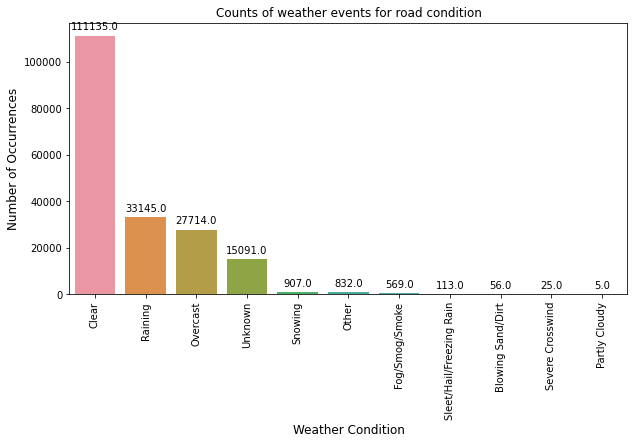

In [8]:
parameter  = df_CPV3['WEATHER'].value_counts()
#city_count = city_count[:10,]
plt.figure(figsize=(10,5))
splot=sns.barplot(parameter.index, parameter.values, alpha=1.0)
plt.title('Counts of weather events for road condition')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Weather Condition', fontsize=12)
plt.xticks(rotation='vertical')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '0.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

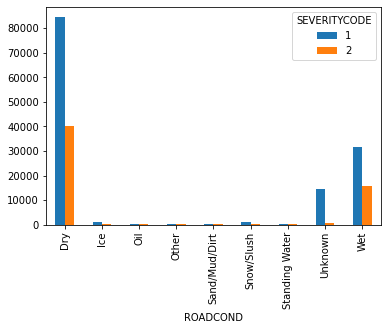

In [9]:
df_CPV3.groupby(['ROADCOND','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

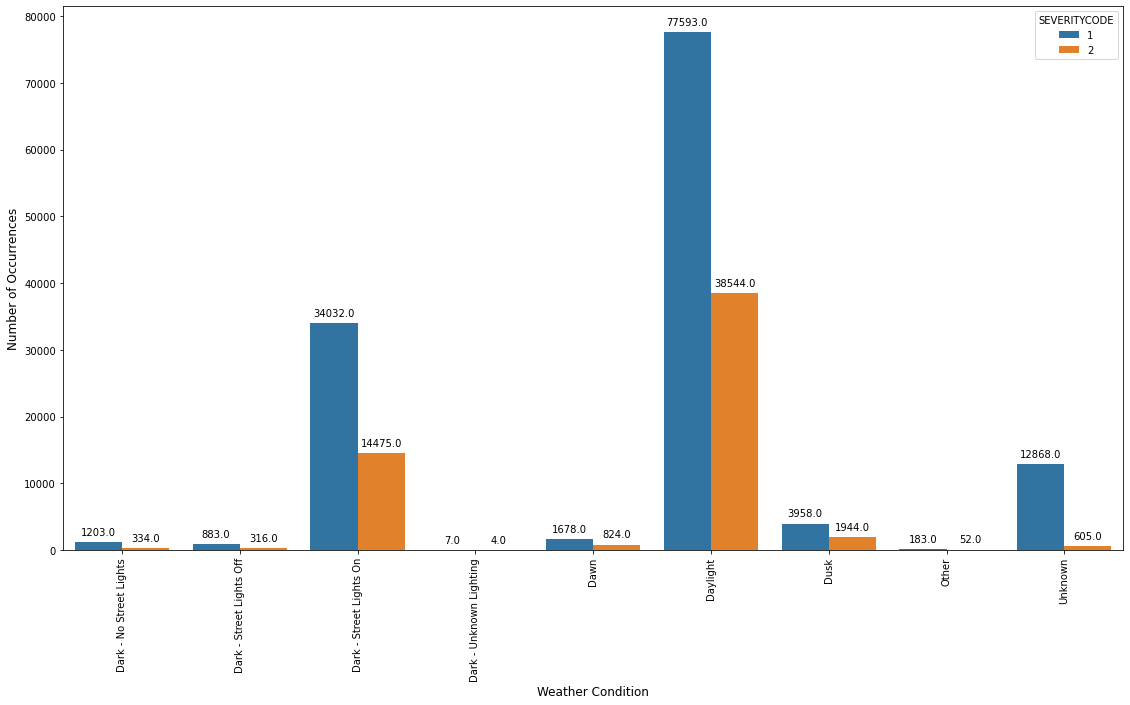

In [10]:
#This is checking the severity intensity/sum of each parameter 
ddd=df_CPV3.groupby(['LIGHTCOND','SEVERITYCODE']).size().reset_index()

ddd[0:8]
plt.figure(figsize=(19,10))
splt = sns.barplot(x=ddd.iloc[:,0], y=ddd.iloc[:,2], hue='SEVERITYCODE', data=ddd)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Weather Condition', fontsize=12)
plt.xticks(rotation='vertical')
for p in splt.patches:
    splt.annotate(format(p.get_height(), '0.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), #this will change the position of the annote number
                   #rotation=90,
                   textcoords = 'offset points')
plt.show()

In [11]:
#Checking the balance of the data set
df_CPV3['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [12]:
#Making the dataFrame balanced.
scode1 = df_CPV3[df_CPV3.SEVERITYCODE==1] #selecting all the rows with severity = 1
scode2 = df_CPV3[df_CPV3.SEVERITYCODE==2] #selecting all the rows with severity = 1

balance_scode = resample(scode1,
                       replace = False,
                       n_samples = 58188,
                       random_state = 123)
dF_balanced = pd.concat([balance_scode,scode2])
#Dropping all the row's with a single nan values. Do not dropna here. DO it for folium map and KNN and other functions
#dF_balanced = dF_balanced.dropna()
print('Small Table:')
print(dF_balanced.SEVERITYCODE.value_counts())

#Balancing dataFrame with total 15 column
s1 = df_CPV15[df_CPV15.SEVERITYCODE==1]
s2 = df_CPV15[df_CPV15.SEVERITYCODE==2]

balance_s = resample(s1,
                       replace = False,
                       n_samples = 58188,
                       random_state = 123)
dF_balanced15 = pd.concat([balance_s,s2])
print('')
#Dropping all the row's with a single nan values. Do not dropna here. DO it for folium map and KNN and other functions
#dF_balanced = dF_balanced15.dropna()
print('With 15 Columns:')
print(dF_balanced15.SEVERITYCODE.value_counts())

Small Table:
2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

With 15 Columns:
2    58188
1    58188
Name: SEVERITYCODE, dtype: int64


In [13]:
dF_balanced.UNDERINFL.value_counts()

N    60232
0    47463
Y     3340
1     2648
Name: UNDERINFL, dtype: int64

In [14]:
#Replacing 0 with N and 1 with Y as this column has mixed datatype values, making it consistent
dF_balanced['UNDERINFL'] = dF_balanced['UNDERINFL'].replace(['0'],'N')
dF_balanced['UNDERINFL'] = dF_balanced['UNDERINFL'].replace(['1'],'Y')
dF_balanced.UNDERINFL.value_counts()

#Replacing 0 with N and 1 with Y as this column has mixed datatype values, making it consistent for large Table
dF_balanced15['UNDERINFL'] = dF_balanced15['UNDERINFL'].replace(['0'],'N')
dF_balanced15['UNDERINFL'] = dF_balanced15['UNDERINFL'].replace(['1'],'Y')
dF_balanced15.UNDERINFL.value_counts()

N    107695
Y      5988
Name: UNDERINFL, dtype: int64

In [15]:
%%time
dF_balanced15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116376 entries, 25055 to 194671
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEVERITYCODE   116376 non-null  int64  
 1   X              113462 non-null  float64
 2   Y              113462 non-null  float64
 3   ADDRTYPE       115454 non-null  object 
 4   COLLISIONTYPE  113666 non-null  object 
 5   PERSONCOUNT    116376 non-null  int64  
 6   PEDCOUNT       116376 non-null  int64  
 7   PEDCYLCOUNT    116376 non-null  int64  
 8   VEHCOUNT       116376 non-null  int64  
 9   JUNCTIONTYPE   113439 non-null  object 
 10  UNDERINFL      113683 non-null  object 
 11  WEATHER        113560 non-null  object 
 12  ROADCOND       113612 non-null  object 
 13  LIGHTCOND      113528 non-null  object 
 14  HITPARKEDCAR   116376 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 14.2+ MB
Wall time: 112 ms


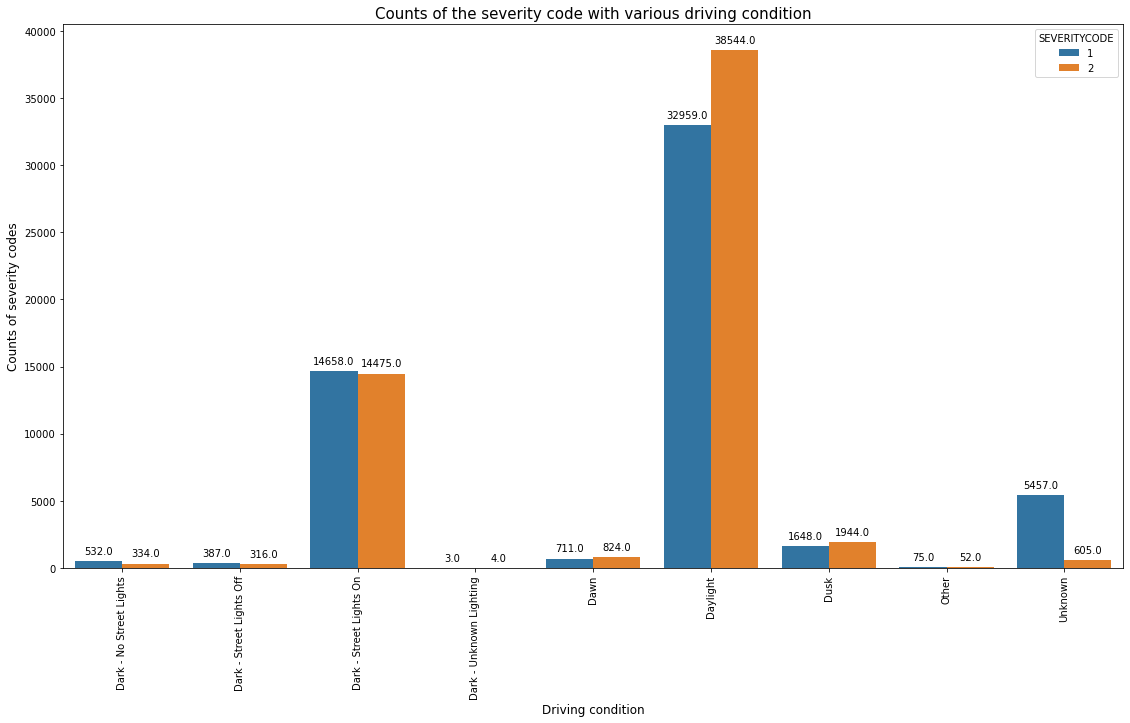

In [16]:
#This is checking the severity intensity/sum of each parameter after balancing out the data
#"X","Y","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND"
diff_condition =dF_balanced.groupby(['LIGHTCOND','SEVERITYCODE']).size().reset_index()

plt.figure(figsize=(19,10))
splt = sns.barplot(x=diff_condition.iloc[:,0], y=diff_condition.iloc[:,2], hue='SEVERITYCODE', data=diff_condition)
plt.title('Counts of the severity code with various driving condition',fontsize=15)
plt.ylabel('Counts of severity codes', fontsize=12)
plt.xlabel('Driving condition', fontsize=12)
plt.xticks(rotation='vertical')
for p in splt.patches:
    splt.annotate(format(p.get_height(), '0.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), #this will change the position of the annote number
                   #rotation=90,
                   textcoords = 'offset points')
plt.show()

### Plotting all the severity at once to check at what condition accident happend the most

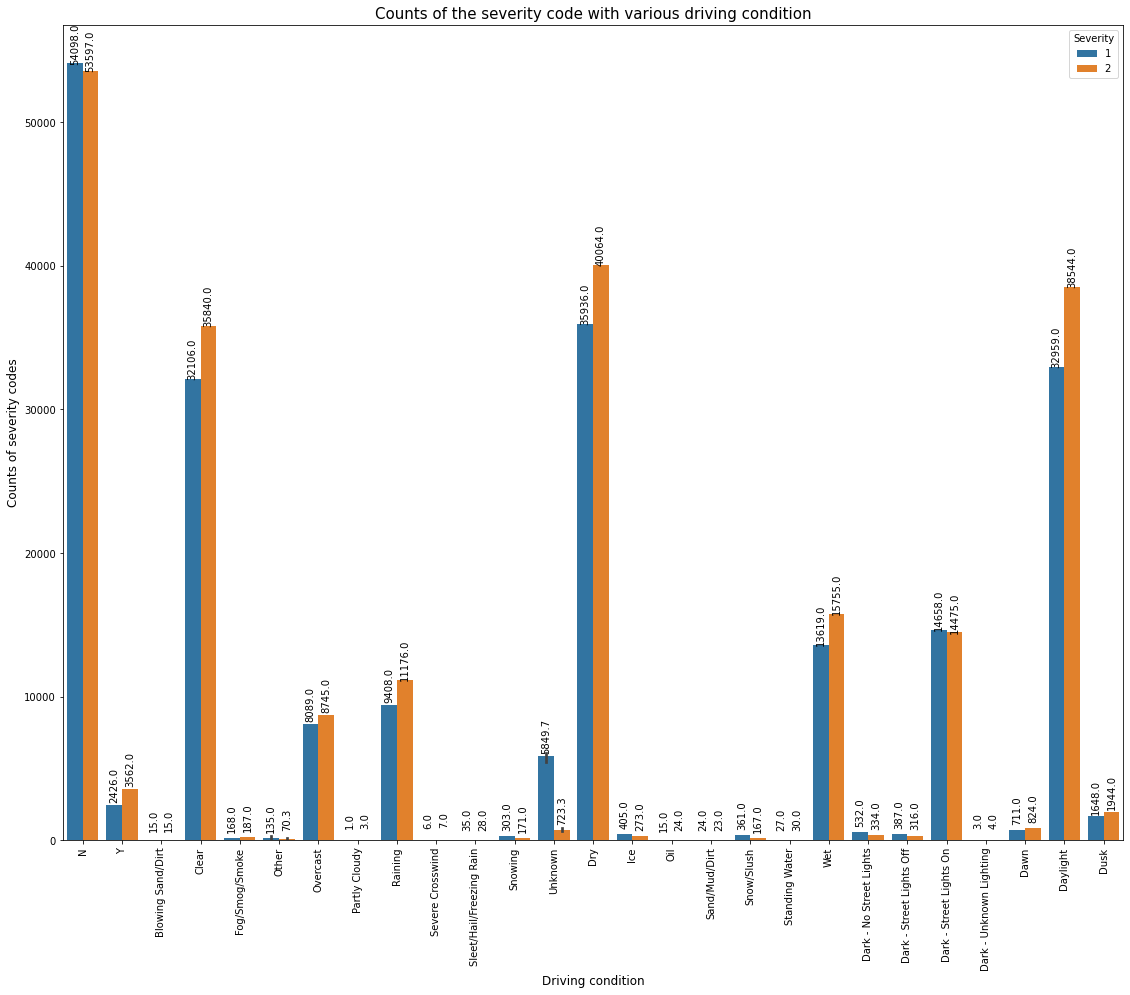

In [17]:

UNDERINFL= dF_balanced.groupby([dF_balanced.iloc[:,3],'SEVERITYCODE']).size().reset_index()
WEATHER  = dF_balanced.groupby([dF_balanced.iloc[:,4],'SEVERITYCODE']).size().reset_index()
ROADCOND = dF_balanced.groupby([dF_balanced.iloc[:,5],'SEVERITYCODE']).size().reset_index()
LIGHTCOND= dF_balanced.groupby([dF_balanced.iloc[:,6],'SEVERITYCODE']).size().reset_index()

#frames = [UNDERINFL,WEATHER,ROADCOND,LIGHTCOND]
np_data = np.concatenate([UNDERINFL,WEATHER,ROADCOND,LIGHTCOND],axis=0)#,ignore_index=True)
all_conditions = pd.DataFrame(data= np_data,columns=["Condition", "Severity","Counts"])
#all_conditions

plt.figure(figsize=(19,15))
splt2 = sns.barplot(x="Condition", y="Counts", hue='Severity', data=all_conditions)
plt.title('Counts of the severity code with various driving condition',fontsize=15)
plt.ylabel('Counts of severity codes', fontsize=12)
plt.xlabel('Driving condition', fontsize=12)
plt.xticks(rotation='vertical')
for p in splt2.patches:
    splt2.annotate(format(p.get_height(), '0.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), #this will change the position of the annote number
                   rotation=90,
                   textcoords = 'offset points')
plt.show()


"\nfor p in splt3.patches:\n    splt3.annotate(format(p.get_height(), '0.1f'), \n                   (p.get_x() + p.get_width() / 2., p.get_height()), \n                   ha = 'center', va = 'center', \n                   xytext = (0, 20), #this will change the position of the annote number\n                   rotation=90,\n                   textcoords = 'offset points')\nplt.show()\n"

<Figure size 1080x576 with 0 Axes>

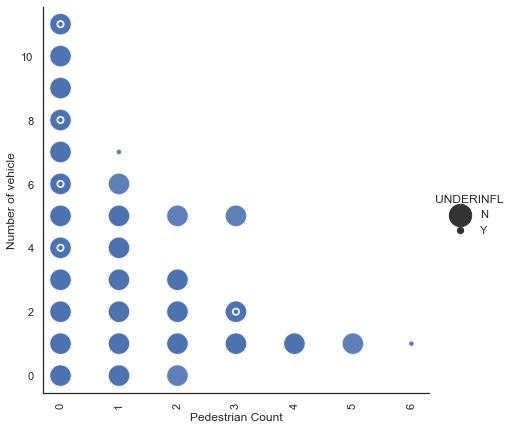

In [66]:
plt.figure(figsize=(15,8))
sns.set_theme(style="white")

# Load the example mpg dataset
#mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x=dF_balanced15.PEDCOUNT,y=dF_balanced15.VEHCOUNT,size=dF_balanced15.UNDERINFL,\
            sizes=(40, 500), alpha=.9, palette="muted", height=6, data=dF_balanced15)
plt.ylabel('Number of vehicle', fontsize=12)
plt.xlabel('Pedestrian Count', fontsize=12)
plt.xticks(rotation='vertical')
'''
for p in splt3.patches:
    splt3.annotate(format(p.get_height(), '0.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), #this will change the position of the annote number
                   rotation=90,
                   textcoords = 'offset points')
plt.show()
'''

In [18]:
#X = dF_balanced.iloc[:,1:]
X = dF_balanced[["X","Y","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND"]]
counts = X[["UNDERINFL","WEATHER","ROADCOND","LIGHTCOND"]]
counts.describe()

,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
count,113683,113560,113612,113528
unique,2,11,9,9
top,N,Clear,Dry,Daylight
freq,107695,67946,76000,71503


In [19]:
dF_balanced15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116376 entries, 25055 to 194671
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEVERITYCODE   116376 non-null  int64  
 1   X              113462 non-null  float64
 2   Y              113462 non-null  float64
 3   ADDRTYPE       115454 non-null  object 
 4   COLLISIONTYPE  113666 non-null  object 
 5   PERSONCOUNT    116376 non-null  int64  
 6   PEDCOUNT       116376 non-null  int64  
 7   PEDCYLCOUNT    116376 non-null  int64  
 8   VEHCOUNT       116376 non-null  int64  
 9   JUNCTIONTYPE   113439 non-null  object 
 10  UNDERINFL      113683 non-null  object 
 11  WEATHER        113560 non-null  object 
 12  ROADCOND       113612 non-null  object 
 13  LIGHTCOND      113528 non-null  object 
 14  HITPARKEDCAR   116376 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 14.2+ MB


In [20]:
#making X variabl and generating dummy variables
Xsml = dF_balanced.iloc[:,1:]
X15c = dF_balanced15.iloc[:,1:]
#making the nirmalization

#Generating Dummy index for all the object variable
Xsml = pd.get_dummies(data=Xsml, columns=['UNDERINFL','WEATHER','ROADCOND','LIGHTCOND'])
X15c = pd.get_dummies(data=X15c, columns=['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER',\
                                          'ROADCOND','LIGHTCOND','UNDERINFL','HITPARKEDCAR'])
Ysml = dF_balanced[['SEVERITYCODE']]
Y15c = dF_balanced15[['SEVERITYCODE']]
'''
scaler = StandardScaler()
Xsml[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(
    Xsml[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])

X15c[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(
    X15c[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])
    '''

"\nscaler = StandardScaler()\nXsml[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(\n    Xsml[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])\n\nX15c[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(\n    X15c[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])\n    "

In [21]:
#Making sets for train test
Xsml_train, Xsml_test, Ysml_train, Ysml_test = train_test_split(Xsml,Ysml,test_size=0.3,random_state=0)
X15c_train, X15c_test, Y15c_train, Y15c_test = train_test_split(X15c,Y15c,test_size=0.3,random_state=0)

print ('Train set with few columns:', Xsml_train.shape,  Ysml_train.shape)
print ('Test set with small few columns:', Xsml_test.shape,  Ysml_test.shape)

Train set with few columns: (81463, 33) (81463, 1)
Test set with small few columns: (34913, 33) (34913, 1)


Wall time: 1.4 s


<AxesSubplot:>

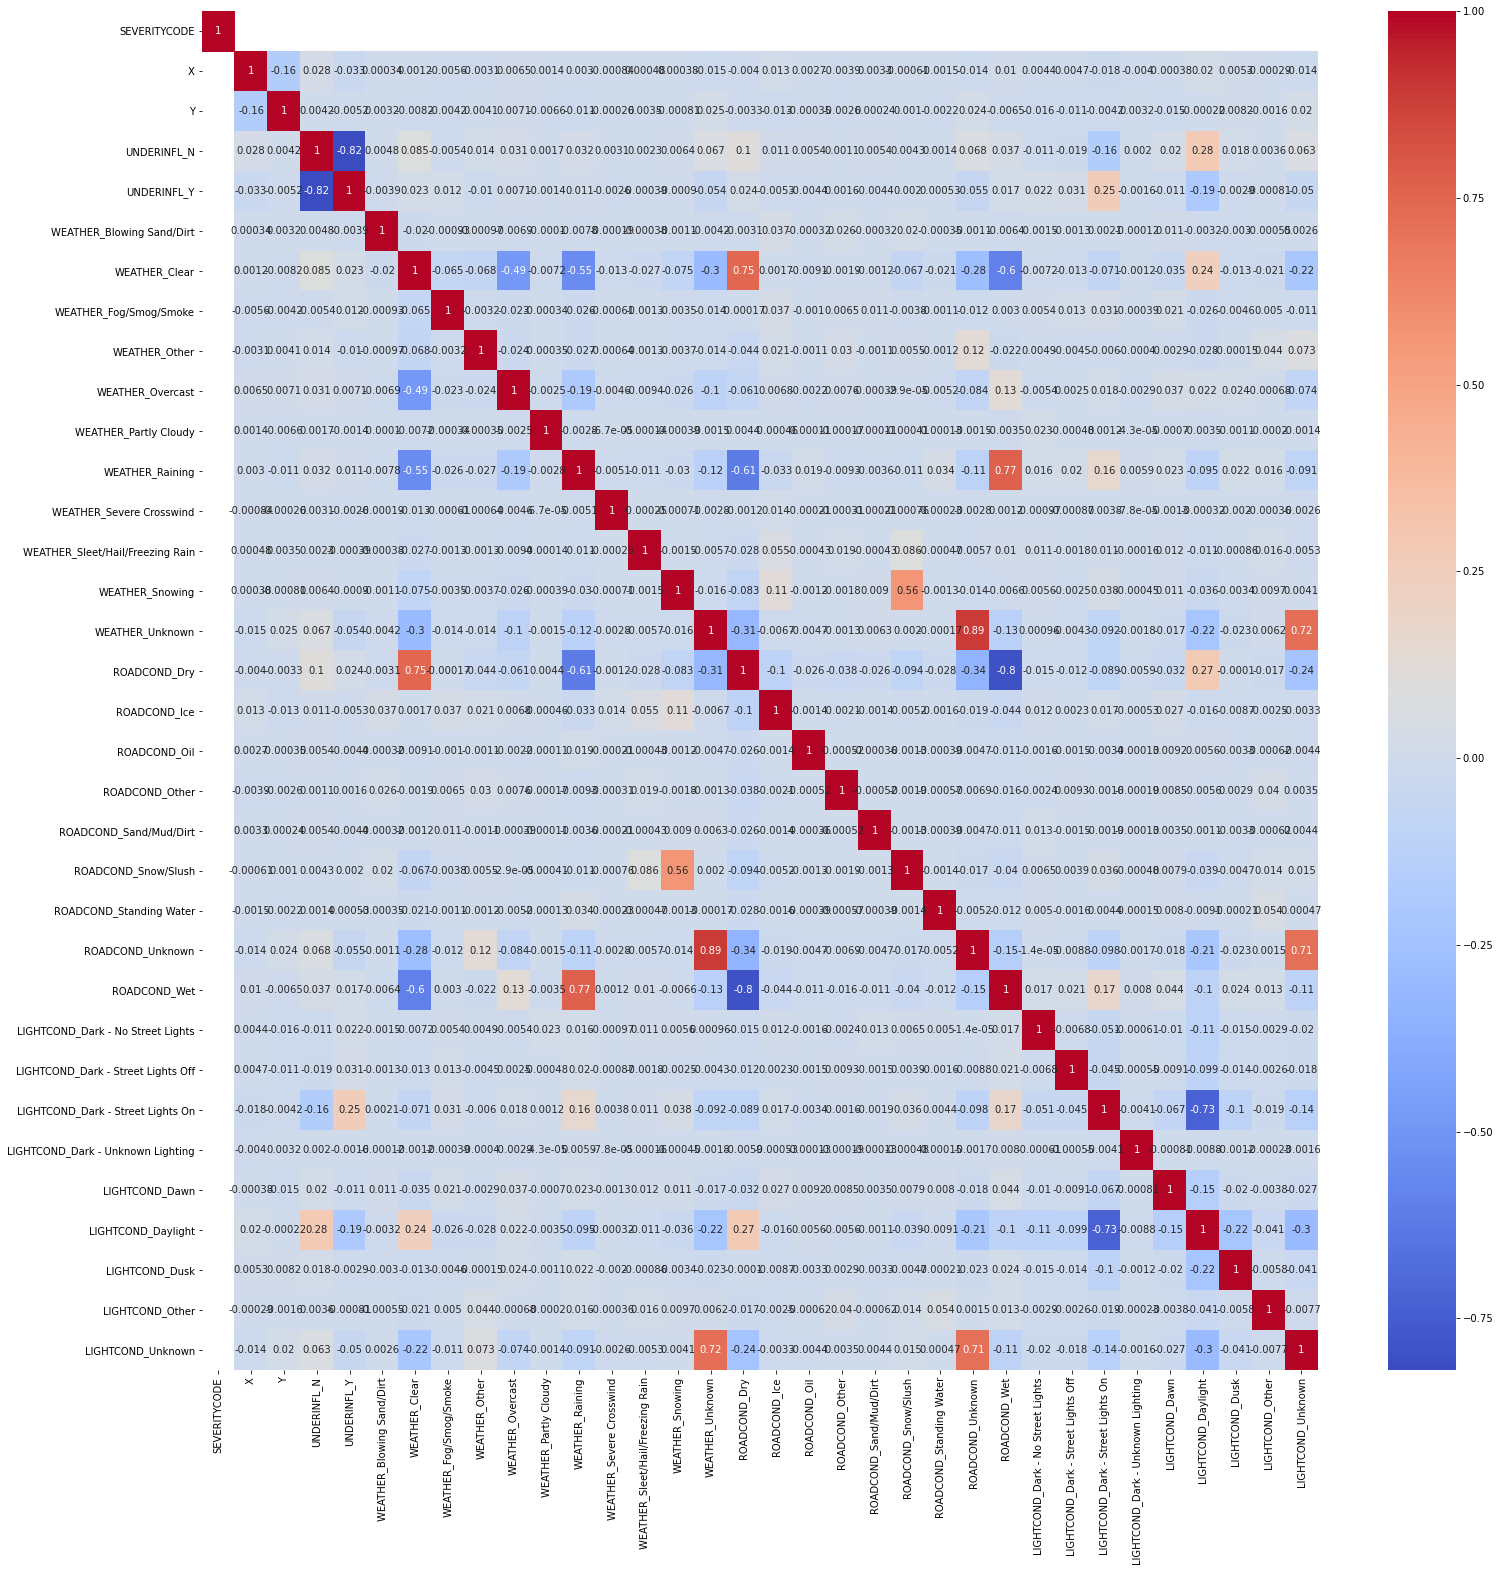

In [22]:
%%time
df_corr = pd.concat([Ysml_train,Xsml_train])
df_corr = df_corr.corr()
plt.figure(figsize=(25,25))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')

In [23]:
#Drawing the map and total count number of the accident location
#I am just commenting out so that I donn't run it often. Uncomment and it will creat the map
#If it doesn't run maybe check and drop all the nan, NaN values
'''
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)# add width=750, height=500 if you want)

locations = list(zip(dF_balanced.Y, dF_balanced.X))
icons = [folium.Icon(icon="car", prefix="fa") for _ in range(len(dF_balanced))]

cluster = plugins.MarkerCluster(locations=locations, icons=icons)
seattle_map.add_child(cluster)
seattle_map
seattle_map.save("seattlemap.html")
webbrowser.open("seattlemap.html")
'''

'\nseattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)# add width=750, height=500 if you want)\n\nlocations = list(zip(dF_balanced.Y, dF_balanced.X))\nicons = [folium.Icon(icon="car", prefix="fa") for _ in range(len(dF_balanced))]\n\ncluster = plugins.MarkerCluster(locations=locations, icons=icons)\nseattle_map.add_child(cluster)\nseattle_map\nseattle_map.save("seattlemap.html")\nwebbrowser.open("seattlemap.html")\n'

## Modeling the Data and testing the  Accuracy
### First lets define the confusion matrix. (Taken from the the coursera course)

In [23]:
%%time
#Defining the confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Wall time: 0 ns


## Model 1: KNN

In [24]:
%time

#Calculating KNN. It takes some time. Change the input data to shorten the time
dF_balanced15 = dF_balanced15.dropna()

X = dF_balanced15.iloc[:,1:]

#Encoding Categorical Features - Training Dataset
X = pd.get_dummies(data=X, columns=['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER',
                                                            'ROADCOND','LIGHTCOND','UNDERINFL','HITPARKEDCAR'])

Y = dF_balanced15[['SEVERITYCODE']]
#print(X.info())
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=4)

scaler = StandardScaler()
X_train[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(
    X_train[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])

#Scaling test data as per the requirements
scaler = StandardScaler()
X_test[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(
    X_test[['X','Y','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])

#X_train.info()
print(X.shape)
print(Y.shape)

knn = KNeighborsClassifier()
params = {'n_neighbors':[4,5,6,7,8],
          'p':[1,2]}
knn1 = GridSearchCV(knn, param_grid=params)
knn1.fit(X_train,Y_train.values.ravel())
knn_predictions = knn1.predict(X_test)

print('Best KNN : ',knn1.best_params_)

#Confusion Matrix
knn_cnf_matrix = confusion_matrix(Y_test,knn_predictions)
print(knn_cnf_matrix,'\n')


#Classification Report
knn_cr = classification_report(Y_test,knn_predictions)
print(knn_cr,'\n')

#Accuracy
acc = accuracy_score(Y_test,knn_predictions)
print(acc,'\n')
accDict = {}
accDict['KNN'] = acc

Wall time: 0 ns


C:\Users\sarkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sarkar\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\sarkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

(108745, 58)
(108745, 1)
Best KNN :  {'n_neighbors': 7, 'p': 2}
[[13727  7305]
 [ 6635 15831]] 

              precision    recall  f1-score   support

           1       0.67      0.65      0.66     21032
           2       0.68      0.70      0.69     22466

    accuracy                           0.68     43498
   macro avg       0.68      0.68      0.68     43498
weighted avg       0.68      0.68      0.68     43498
 

0.679525495425077 



Normalized confusion matrix
[[0.65267212 0.34732788]
 [0.29533517 0.70466483]]


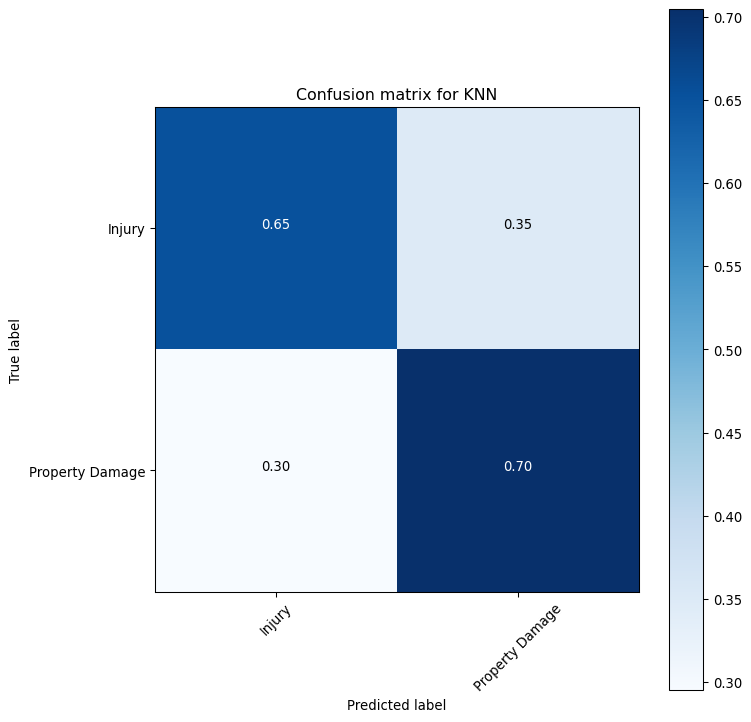

Wall time: 288 ms


In [31]:
%%time
fig = plt.figure(figsize=(8,8),dpi=95)
plot_confusion_matrix(knn_cnf_matrix, classes=['Injury','Property Damage'],title='Confusion matrix for KNN')
plt.show()

## Model 2: Logistic Regression

In [25]:
%%time
#Fitting and Predictions
log_reg = LogisticRegression(random_state = 4)
log_reg.fit(X_train,Y_train)
log_reg_predictions = log_reg.predict(X_test)

#Confusion Matrix
log_reg_cmf_matrix = confusion_matrix(Y_test,log_reg_predictions)
print(log_reg_cmf_matrix,'\n')

#Classification Report
log_reg_classf_rpt = classification_report(Y_test,log_reg_predictions)
print(log_reg_classf_rpt,'\n')

#Accuracy
acc = accuracy_score(Y_test,log_reg_predictions)
print(acc,'\n')
#accDict = {}
accDict['LR'] = acc

C:\Users\sarkar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[12125  8907]
 [ 3975 18491]] 

              precision    recall  f1-score   support

           1       0.75      0.58      0.65     21032
           2       0.67      0.82      0.74     22466

    accuracy                           0.70     43498
   macro avg       0.71      0.70      0.70     43498
weighted avg       0.71      0.70      0.70     43498
 

0.7038484528024277 

Wall time: 1.42 s


C:\Users\sarkar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Normalized confusion matrix
[[0.57650247 0.42349753]
 [0.17693403 0.82306597]]


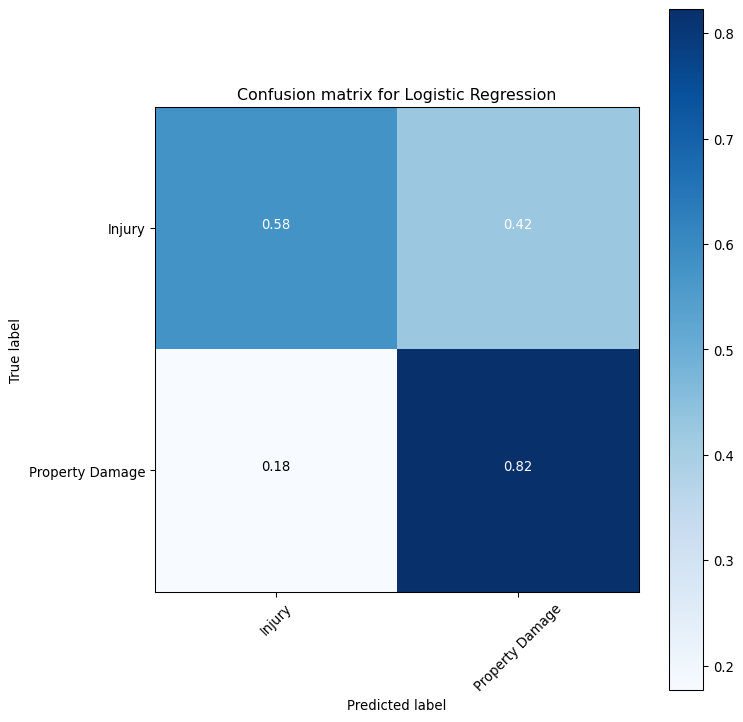

Wall time: 350 ms


In [26]:
%%time
fig = plt.figure(figsize=(8,8),dpi=95)
plot_confusion_matrix(log_reg_cmf_matrix, classes=['Injury','Property Damage'], title='Confusion matrix for Logistic\
 Regression')
plt.show()

## Model 3: Decision Tree Classifier

In [27]:
#Fitting and Predictions
D_tree_c = DecisionTreeClassifier()
params = {'criterion':['gini', 'entropy'], 
          'random_state':[0]}
D_tree_c1 = GridSearchCV(D_tree_c, param_grid=params)
D_tree_c1.fit(X_train,Y_train)
D_tree_c_predictions = D_tree_c1.predict(X_test)
print('Best Decision Tree Classifier : ',D_tree_c1.best_params_)

#Confusion Matrix
D_tree_c_cmf_matrix =confusion_matrix(Y_test,D_tree_c_predictions)
print(D_tree_c_cmf_matrix,'\n')

#Classification Report
D_tree_c_clssf_rpt = classification_report(Y_test,D_tree_c_predictions)
print(D_tree_c_clssf_rpt,'\n')

#Accuracy
acc = accuracy_score(Y_test,D_tree_c_predictions)
print(acc,'\n')
accDict['DTC'] = acc

Best Decision Tree Classifier :  {'criterion': 'entropy', 'random_state': 0}
[[13574  7458]
 [ 8292 14174]] 

              precision    recall  f1-score   support

           1       0.62      0.65      0.63     21032
           2       0.66      0.63      0.64     22466

    accuracy                           0.64     43498
   macro avg       0.64      0.64      0.64     43498
weighted avg       0.64      0.64      0.64     43498
 

0.6379143868683618 



Normalized confusion matrix
[[0.64539749 0.35460251]
 [0.36909107 0.63090893]]


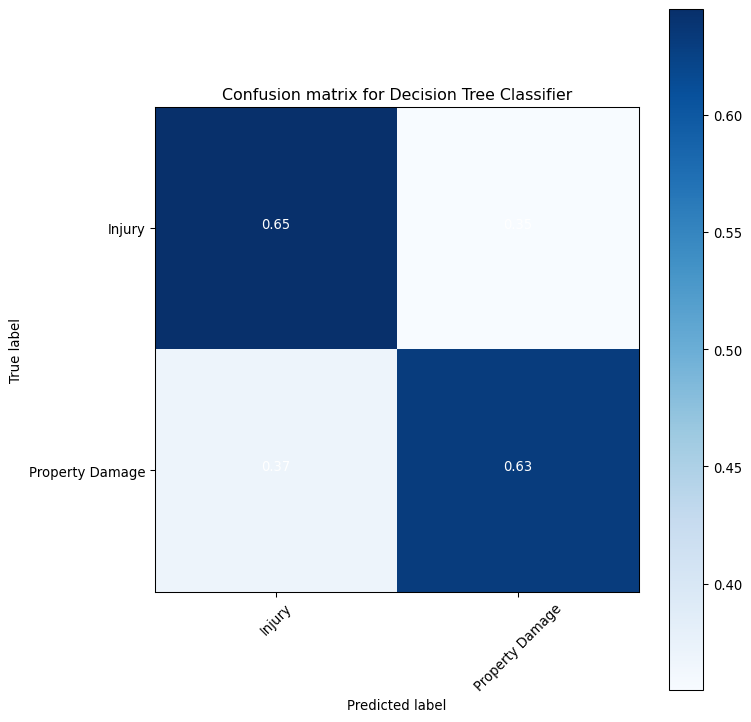

Wall time: 254 ms


In [28]:
%%time
fig = plt.figure(figsize=(8,8),dpi=95)
plot_confusion_matrix(D_tree_c_cmf_matrix, classes=['Injury','Property Damage'], title='Confusion matrix for Decision \
Tree Classifier')
plt.show()

# Model 4: Support Vector Machine (SVM)